<a href="https://colab.research.google.com/github/Madhav2008/Project134/blob/main/Final_Project_132%2C_133_And_134.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving final_data.csv to final_data.csv


In [2]:
import pandas as pd
import csv

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius
0,0,Sun,0.000015813,1.0,1
1,1,Sirius,8.6,2.1,1.71
2,2,Canopus,310,15.0,71
3,3,Alpha Centauri,4.4,1.1,1.2
4,4,Arcturus,37,1.1,26


In [5]:
df.columns

Index(['Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,Star_name,Distance,Mass,Radius
0,Sun,0.000015813,1.0,1
1,Sirius,8.6,2.1,1.71
2,Canopus,310,15.0,71
3,Alpha Centauri,4.4,1.1,1.2
4,Arcturus,37,1.1,26


In [8]:
df.dtypes

Star_name     object
Distance      object
Mass         float64
Radius        object
dtype: object

In [9]:
df['Radius']=df['Radius'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [10]:
radius = df['Radius'].to_list()
mass = df['Mass'].to_list()
gravity =[]

def convert_to_si(radius,mass):
    for i in range(0,len(radius)-1):
        radius[i] = radius[i]*6.957e+8
        mass[i] = mass[i]*1.989e+30
        
convert_to_si(radius,mass)


In [32]:
def gravity_calculation(radius,mass):
    G = 6.674e-11
    for index in range(0,len(mass)):
        g= (mass[index]*G)/((radius[index])**2)
        gravity.append(g)
        
gravity_calculation(radius,mass)

# df["Gravity"] = gravity
df["Distance"] = df["Distance"].apply(lambda x: x.replace("$", "").replace(",", "")).astype("float")
df

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.000000,1.000000,2.742692e+02
1,1,Sirius,8.600000,2.100000,1.710000,1.969718e+02
2,2,Canopus,310.000000,15.000000,71.000000,8.161153e-01
3,3,Alpha Centauri,4.400000,1.100000,1.200000,2.095112e+02
4,4,Arcturus,37.000000,1.100000,26.000000,4.462960e-01
...,...,...,...,...,...,...
248,248,2MASSI J2356547-155310,74.000000,0.076367,0.112012,1.669385e+03
249,249,WISE 0410+1502,20.000000,0.005728,0.120233,1.086673e+02
250,250,WISE 0458+6434A,35.900000,0.014319,0.431605,2.108201e+01
251,251,WISE 0458+6434B,35.900000,0.009546,0.390499,1.716928e+01


In [33]:
df.to_csv("star_with_gravity.csv")

In [34]:
df.dtypes

Unnamed: 0      int64
Star_name      object
Distance      float64
Mass          float64
Radius        float64
Gravity       float64
dtype: object

In [35]:
df = pd.read_csv("star_with_gravity.csv")

In [36]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,2,Canopus,310.000000,15.0,71.00,0.816115
3,3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
4,4,4,Arcturus,37.000000,1.1,26.00,0.446296


In [37]:
mass = df["Mass"].to_list()
radius = df["Radius"].to_list()
gravity = df["Gravity"].to_list()

In [38]:
mass.sort()
radius.sort()
gravity.sort()

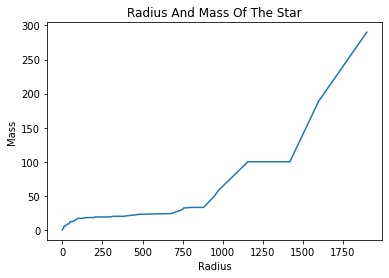

In [39]:
import matplotlib.pyplot as plt

plt.plot(radius, mass)
plt.title("Radius And Mass Of The Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

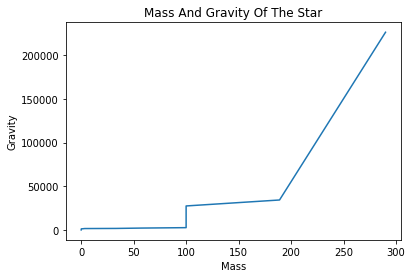

In [40]:
import matplotlib.pyplot as plt

plt.plot(mass, gravity)
plt.title("Mass And Gravity Of The Star")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

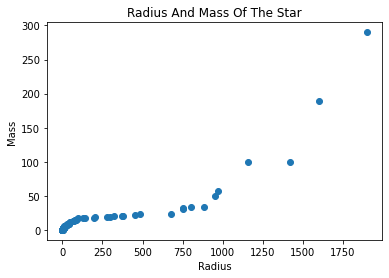

In [41]:
import matplotlib.pyplot as plt

plt.scatter(radius, mass)
plt.title("Radius And Mass Of The Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

In [42]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,2,Canopus,310.000000,15.0,71.00,0.816115
3,3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
4,4,4,Arcturus,37.000000,1.1,26.00,0.446296


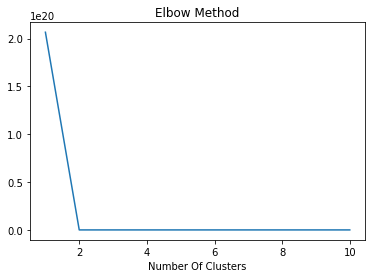

In [43]:
from sklearn.cluster import KMeans

X = df.iloc[:, [3, 4]].values
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.show()

In [44]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,2,Canopus,310.000000,15.0,71.00,0.816115
3,3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
4,4,4,Arcturus,37.000000,1.1,26.00,0.446296


In [45]:
filterstars = []

for d in df.Distance:
  if d <= 100:
    filterstars.append(True)
  else:
    filterstars.append(False)

In [46]:
is_dist = pd.Series(filterstars)
is_dist.head()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [48]:
star_dist = df[is_dist]
star_dist.shape

(159, 7)

In [54]:
star_dist.reset_index(inplace=True, drop=True)

In [55]:
gravity_stars = []

for g in star_dist.Gravity:
  if g <= 350 and g >= 150:
    gravity_stars.append(True)
  else:
    gravity_stars.append(False)

In [56]:
is_gravity = pd.Series(gravity_stars)
is_gravity.head()

0     True
1     True
2     True
3    False
4    False
dtype: bool

In [59]:
final_stars = star_dist[is_gravity]
final_stars.reset_index(inplace=True, drop=True)
final_stars.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,12,12,Altair,17.000000,1.8,1.80,152.371756
4,18,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [60]:
final_stars.to_csv("Filtered Stars.csv")